<a href="https://colab.research.google.com/github/chonholee/tutorial/blob/main/bigdata/BigDataII_10_MLP_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
! pip list

# MNIST Dataset

In [ ]:
# (1) 手書き数字画像のデータセットをダウンロード・正規化
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

num_classes = 10

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# 一枚表示
sample = 1
image = x_train[sample]# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

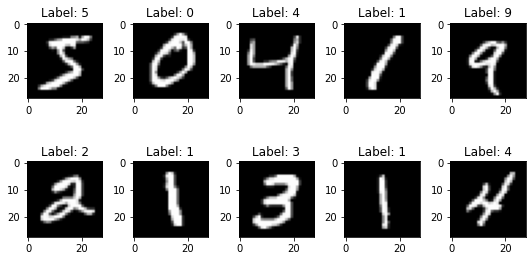

In [4]:
# 10枚、ラベルと一緒に表示
num = 10
images = x_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# MLP (Multi Layer Perceptron)

In [ ]:
# (2) MLPモデルを構築
model = tf.keras.models.Sequential()
model.add(  )
model.add(  )
model.add(  )
model.add(  )

In [ ]:
# (3) モデルのコンパイル
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# (4) モデルの学習開始
model.fit(x_train, y_train, epochs=5)

In [ ]:
# (5) モデルの評価
model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
# (6) モデルの保存と読み込み

# 保存
# 指定した名前のフォルダ内に、ネットワーク構造や重みなどの関連データが保存される
model_filename = 'mymodel_mlp'
model.save(model_filename)

# 読み込み
# 学習済みモデルを読み込んで利用できる
model = tf.keras.models.load_model(model_filename)

In [ ]:
# (7) テストデータを分類してみる
import numpy as np

# 学習済みモデルの読み込み
model = tf.keras.models.load_model(model_filename)

testid = 6
outputs = model.predict(x_test[testid:testid+1]) # softmax の結果（信頼度）
predicted = np.argmax(outputs)

print('outpus', outputs)
print('predicted class label', predicted)
print('true class label', y_test[testid])

In [ ]:
import csv

outputs = model.predict(x_test[0:20]) # softmax の結果（信頼度）
#print('outpus', outputs)

predicted = np.argmax(outputs, 1)
print("testid, true, predicted, iscorrect")
with open("results.csv", "w") as f:
  writer = csv.writer(f)
  writer.writerow(["testid", "true", "predicted", "iscorrect"])
  for i in range(len(predicted)):
    row = [i, y_test[i], predicted[i], y_test[i]==predicted[i]]
    writer.writerow(row)
    print(row)

# CNN

In [ ]:
# (2) CNNモデルを構築
# 最初の畳み込み層に入力データの情報を加えました（Reshapeは省略）
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu') )      # 追加
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )              # 追加
model.add( tf.keras.layers.Conv2D(32, (3, 3), activation='relu') )      # 追加
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )              # 追加
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense(128, activation='relu') )
model.add( tf.keras.layers.Dropout(0.2) )
model.add( tf.keras.layers.Dense(num_classes, activation='softmax') )

# (3) モデルのコンパイル
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# (4) モデルの学習開始
model.fit(x_train, y_train, epochs=5)

# (5) モデルの評価
model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
# モデルの構造を見てみる

model.summary()

In [ ]:
# 保存

model_filename = 'mymodel_cnn'
model.save(model_filename)

# 第10回 課題

以下のセル内の「here」を埋めて実行してみてください。

# cifar10 Dataset の分類

runtimeの種類をGPUに変更することを勧めます。学習の処理が早くなります。

In [ ]:
cifar10 = tf.keras.datasets.cifar10

# データをロードして、x_train, y_train, x_test, y_testを準備してください

here


In [ ]:
# データのサイズ（shape）、画像1枚のサイズ（縦横ピクセルサイズ）を確認してください

here


In [ ]:
# RGB画像、R（レッド）,G（グリーン）,B（ブルー）の三つのチャンネルにそれぞれ0から255の値が入っています。
# その値を255.0で割ることによって、R,G,Bに入っている値が0から1までになるようにしてください。

here


In [ ]:
# 好きな画像を10枚、ラベルと一緒に表示させなさい。

here


In [ ]:
# CNNモデルを定義しなさい
#   基本的にはMNISTデータの演習で行ったCNNと同じ構造でよいです。
#   入力データのサイズとチャネル数を修正

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu') )      # 追加
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )              # 追加
model.add( tf.keras.layers.Conv2D(32, (3, 3), activation='relu') )      # 追加
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )              # 追加
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense(128, activation='relu') )
model.add( tf.keras.layers.Dropout(0.2) )
model.add( tf.keras.layers.Dense(num_classes, activation='softmax') )


In [ ]:
# モデルのコンパイル

here


In [ ]:
# モデルの学習
#   epochs=5 で学習

here


In [ ]:
# モデルの評価

here

In [ ]:
# model.predict(...) を使って、test画像をいくつか分類してみてください。

here


In [ ]:
# モデルを再学習
#   epochs=20 で学習

here



In [ ]:
# モデルの評価
#　lossは下がってますか？accuracyはあがってますか？

here

In [ ]:
# model.predict(...) を使って、test画像をいくつか分類してみてください。

here


## 補足（時間の関係で講義内に説明しきればかった内容）

オンラインの資料などを見ながら勉強してみてください。

*   **softmax**
*   **one-hot encoding**

今回の演習や課題で扱ったデータセットのラベルはカテゴリーデータ（離散値）です。

*   mnist dataでは、０～９までの数字
*   cifar10 dataでは、物体の名前に対応した0～９までの数字

例えば、y_train[0] には（x_train[0]に対応した）１つの値が格納されています。

ですが、モデルの最終層のニューロンの数はクラスの数（10個）となっています。

```
model.add( tf.keras.layers.Dense(10, activation='softmax') )
```

講義で損失関数（真値と計算値の誤差）の話をしましたが、現在真値は1個、計算値は10個の値があるので単純に引き算（損失関数）を計算できません。

実は
```
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
```
の「sparse categorical crossentoropy」内で上手く計算してくれています。

一般的には、真値の数を最終層の数（分類するクラスの数）と合わせるための処理をします。

その一つが 「**one-hot encodings**」 と呼ばれるものです。

例えば

2 (bird) は [0,0,1,0,0,0,0,0,0,0]

7 (horse) は [0,0,0,0,0,0,0,1,0,0]

とエンコーディング変換する事を言います。

In [ ]:
import numpy as np

print(y_train[0]) # 確認

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(y_train[0]) # 確認

クラスラベル（y_train と y_test）を one-hot として扱う場合は、「categorical_crossentropy」というlossを使います。

試してみてください。

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
a = [[('n04592741', 'wing', 0.9714641), ('n02690373', 'airliner', 0.025861548), ('n04266014', 'space_shuttle', 0.0013809769)], [('n03899768', 'patio', 0.51726824), ('n03028079', 'church', 0.25273263), ('n04005630', 'prison', 0.046136115)], [('n02129604', 'tiger', 0.767321), ('n02123159', 'tiger_cat', 0.22703454), ('n02391049', 'zebra', 0.004188579)], [('n02504013', 'Indian_elephant', 0.7616036), ('n01871265', 'tusker', 0.21664836), ('n02504458', 'African_elephant', 0.021731125)], [('n11939491', 'daisy', 0.26833987), ('n01828970', 'bee_eater', 0.14348479), ('n03876231', 'paintbrush', 0.08295382)]]

In [ ]:
for i, labels in enumerate(a):
  print(i, labels)

0 [('n04592741', 'wing', 0.9714641), ('n02690373', 'airliner', 0.025861548), ('n04266014', 'space_shuttle', 0.0013809769)]
1 [('n03899768', 'patio', 0.51726824), ('n03028079', 'church', 0.25273263), ('n04005630', 'prison', 0.046136115)]
2 [('n02129604', 'tiger', 0.767321), ('n02123159', 'tiger_cat', 0.22703454), ('n02391049', 'zebra', 0.004188579)]
3 [('n02504013', 'Indian_elephant', 0.7616036), ('n01871265', 'tusker', 0.21664836), ('n02504458', 'African_elephant', 0.021731125)]
4 [('n11939491', 'daisy', 0.26833987), ('n01828970', 'bee_eater', 0.14348479), ('n03876231', 'paintbrush', 0.08295382)]
